In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [326]:
data = pd.read_csv('ChinaData.csv')
data.head(5)

,id,source,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,first_review,last_review,review_scores_rating,review_scores_accuracy,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103760,city scrape,304876,Brendan,30/11/2010,Hong Kong,within a day,100%,69%,f,...,19/06/2011,13/02/2024,4.47,4.40,f,6,2,4,0,1.92
1,248140,previous scrape,1300549,Darren,17/10/2011,Hong Kong,within an hour,100%,81%,f,...,30/10/2011,06/12/2024,4.90,4.91,f,1,1,0,0,1.37
2,263081,city scrape,1370155,Chuster,04/11/2011,Hong Kong,within a few hours,100%,NaN,f,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,274589,city scrape,1435069,Shanshan,23/11/2011,Hong Kong,within a day,100%,86%,t,...,16/12/2011,02/11/2024,4.77,4.76,f,1,1,0,0,1.90
4,280746,city scrape,1443229,Shan,26/11/2011,Hong Kong,within a few hours,100%,88%,f,...,21/04/2012,06/12/2024,4.25,4.20,t,2,2,0,0,0.36


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6718 non-null   int64  
 1   source                                        6718 non-null   object 
 2   host_id                                       6718 non-null   int64  
 3   host_name                                     6718 non-null   object 
 4   host_since                                    6718 non-null   object 
 5   host_location                                 4431 non-null   object 
 6   host_response_time                            6401 non-null   object 
 7   host_response_rate                            6401 non-null   object 
 8   host_acceptance_rate                          6475 non-null   object 
 9   host_is_superhost                             6641 non-null   o

Aplicar métodos para reemplazar valores nulos del dataframe

In [328]:
data_cuanti=data.select_dtypes(include=["float64","int64","float","int"])
data_cuali=data.select_dtypes(include=["object","datetime","category","datetime64[ns]"])

cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))
cualis_bfill=data_cuali.fillna(method="bfill")
cualis_ffill=data_cuanti.fillna(method="ffill")

data_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data_sin_nulos

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_1444\3093759005.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_1444\3093759005.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuanti.fillna(method="ffill")


,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103760,304876,59,6,1.0,2.0,3.0,28,1125,28,...,316,3,0,4.47,4.40,6,2,4,0,1.92
1,248140,1300549,1,2,1.2,1.0,1.6,30,150,30,...,220,23,2,4.90,4.91,1,1,0,0,1.37
2,263081,1370155,1,8,2.5,3.0,6.0,10,30,10,...,0,0,0,4.90,4.91,1,0,1,0,1.37
3,274589,1435069,1,4,1.0,2.0,3.0,28,365,3,...,302,28,0,4.77,4.76,1,1,0,0,1.90
4,280746,1443229,19,6,2.0,3.0,3.0,3,365,3,...,56,10,1,4.25,4.20,2,2,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1305922079484820904,4209137,38,6,1.0,2.0,3.0,1,365,1,...,0,0,0,5.00,5.00,34,14,19,1,1.00
6714,1306173025771347835,57341318,1,2,1.0,1.0,1.0,1,365,1,...,0,0,0,5.00,5.00,1,1,0,0,1.00
6715,1306185405897992592,667730514,1,2,1.0,1.0,1.0,1,14,1,...,0,0,0,5.00,5.00,1,1,0,0,1.00
6716,1306203936024566574,280827591,1,1,1.0,1.0,1.0,1,365,1,...,0,0,0,5.00,5.00,1,0,1,0,1.00


In [329]:
nulos=data_sin_nulos.isnull().sum()
nulos

id                                              0
host_id                                         0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0


Aplicar método (Rango Intercuartílico) para eliminar Outliers del dataframe

In [330]:
cuantitativas=data.select_dtypes(include=["float64","int64","float","int"])
cualitativas=data.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,source,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,city scrape,Brendan,30/11/2010,Hong Kong,within a day,100%,69%,f,Central,"['email', 'phone']",...,316,3,0,NaN,NaN,6,2,4,0,1.92
1,previous scrape,Darren,17/10/2011,Hong Kong,within an hour,100%,81%,f,Sheung Wan,"['email', 'phone']",...,220,23,2,NaN,NaN,1,1,0,0,1.37
2,city scrape,Chuster,04/11/2011,Hong Kong,within a few hours,100%,NaN,f,The Peak,"['email', 'phone', 'work_email']",...,0,0,0,NaN,NaN,1,0,1,0,0.90
3,city scrape,Shanshan,23/11/2011,Hong Kong,within a day,100%,86%,t,Wan Chai,"['email', 'phone']",...,302,28,0,NaN,NaN,1,1,0,0,1.90
4,city scrape,Shan,26/11/2011,Hong Kong,within a few hours,100%,88%,f,Stanley,"['email', 'phone']",...,56,10,1,NaN,NaN,2,2,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,city scrape,Cherry,21/11/2012,Hong Kong,within an hour,100%,98%,f,Wan Chai,"['email', 'phone']",...,0,0,0,NaN,NaN,34,14,19,1,0.90
6714,city scrape,Edwin,04/02/2016,Hong Kong,NaN,NaN,NaN,f,Mid-Levels,"['email', 'phone']",...,0,0,0,NaN,NaN,1,1,0,0,0.90
6715,city scrape,James John,19/12/2024,NaN,NaN,NaN,NaN,f,Wong Chuk Hang,"['email', 'phone']",...,0,0,0,NaN,NaN,1,1,0,0,0.90
6716,city scrape,Iryna,31/07/2019,NaN,NaN,NaN,NaN,f,Sai Wan,['phone'],...,0,0,0,NaN,NaN,1,0,1,0,0.90


Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas (15)

In [331]:
def analisis_univariado(variable):
    tabla=freq_tbl(data[variable])
    tabla_cfiltro= tabla.drop(['percentage','cumulative_perc'], axis=1)
    tabla_filtrada= tabla_cfiltro[tabla_cfiltro['frequency']>1]
    filtrada_index= tabla_filtrada.set_index(variable)
    return(filtrada_index)

Categorizar las variables

Text(0.5, 1.0, 'Tasas de Respuestas')

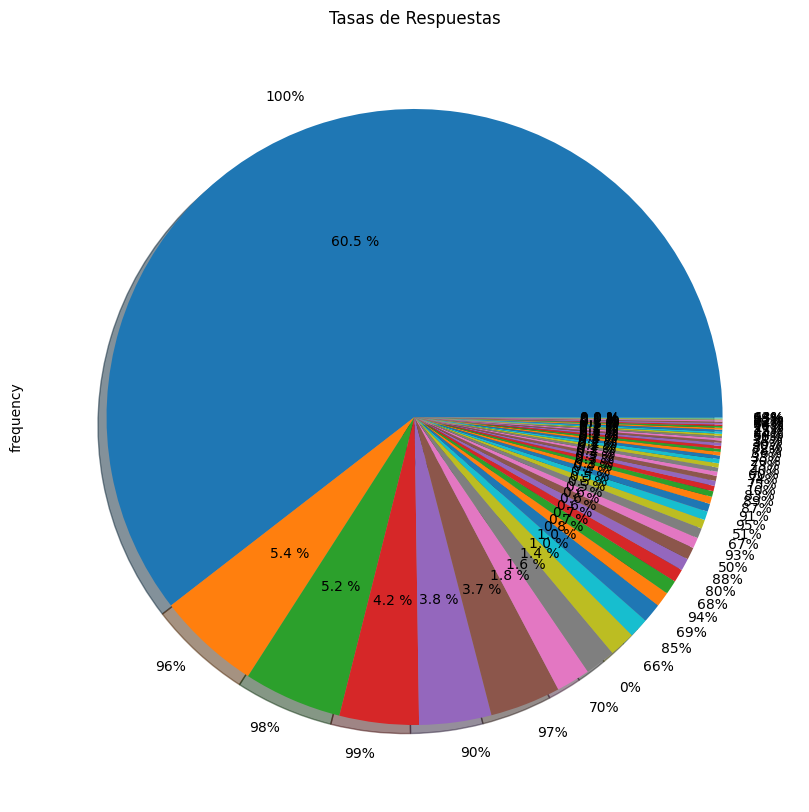

In [332]:
#host_response_rate
filtrada_index=analisis_univariado("host_response_rate")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Tasas de Respuestas')

Text(0.5, 1.0, 'Tasas de Aceptación')

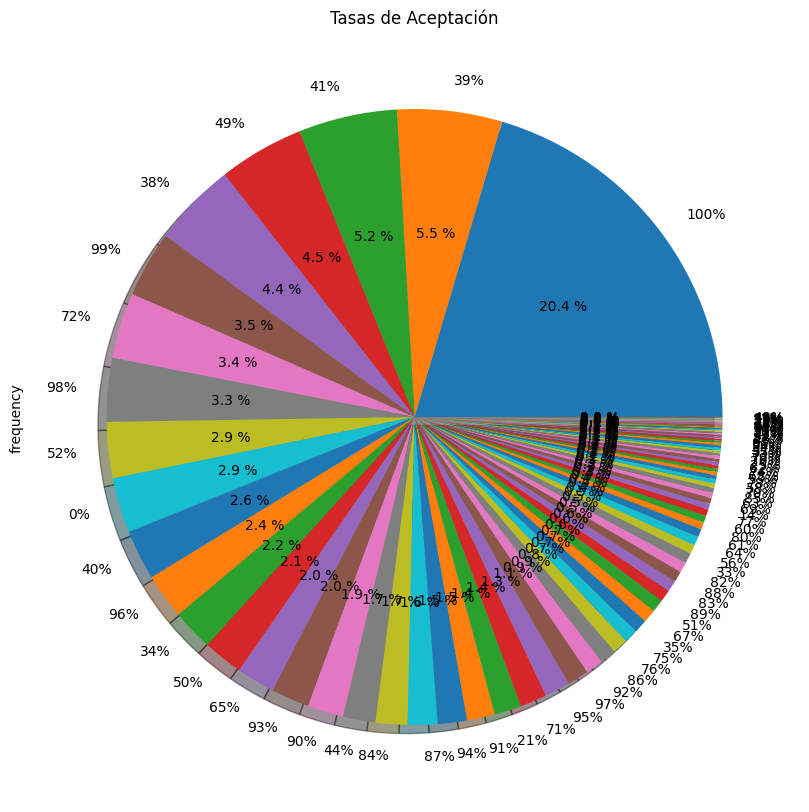

In [333]:
#host_acceptance_rate
filtrada_index=analisis_univariado("host_acceptance_rate")
filtrada_index["frequency"].plot(kind='pie', figsize=(15,10), shadow=True, autopct="%0.1f %%")
plt.title('Tasas de Aceptación')

In [334]:
#host_total_listings_count


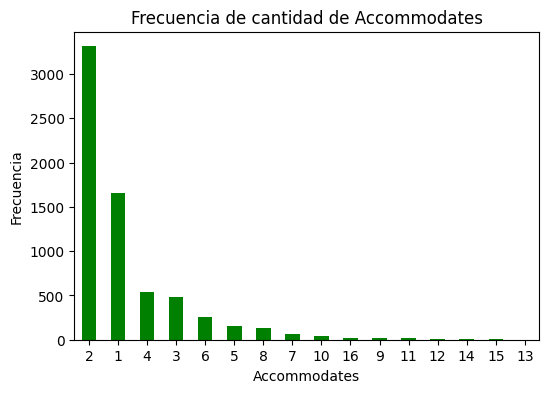

In [335]:
#accommodates
df = pd.DataFrame(data, columns=["accommodates"])
counts = df["accommodates"].value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["green"])
plt.xlabel("Accommodates")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de cantidad de Accommodates")
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Frecuencia')

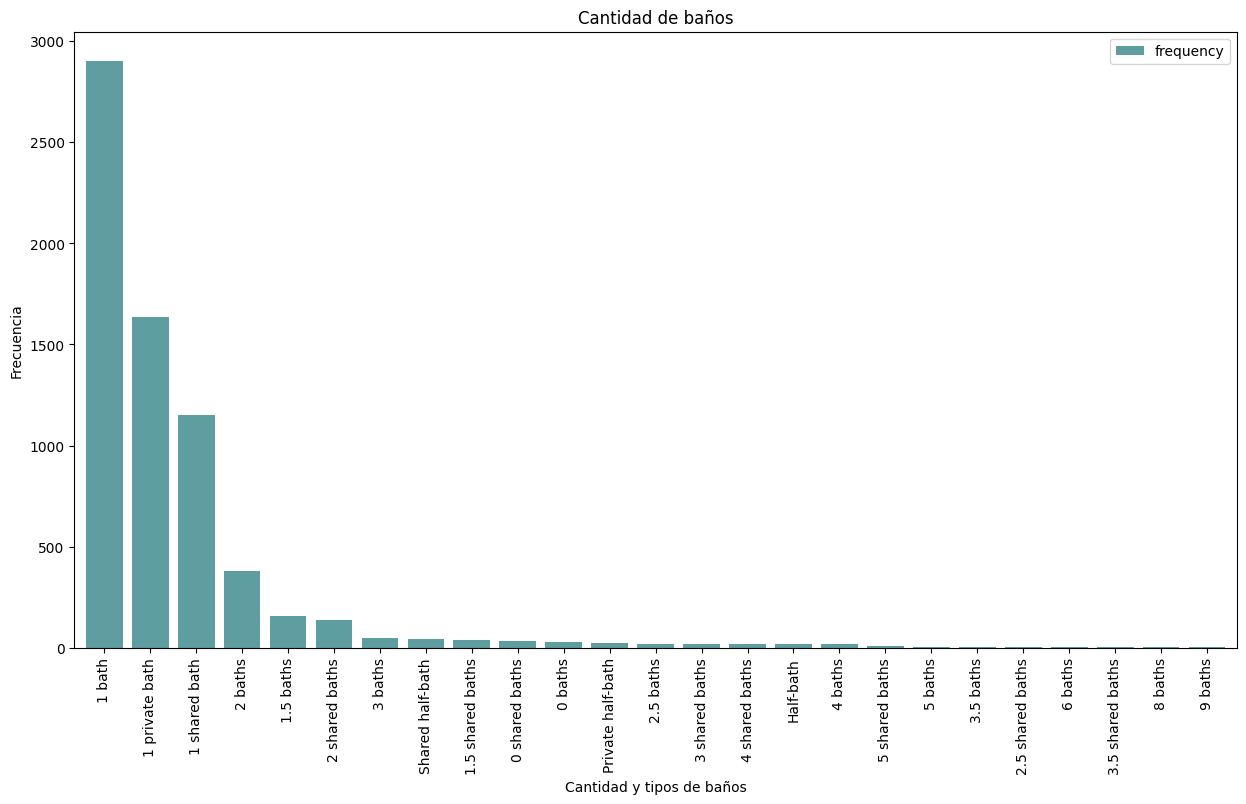

In [336]:
#bathrooms_text
filtrada_index=analisis_univariado("bathrooms_text")
filtrada_index.plot(kind = 'bar', width=0.8, figsize=(15,8), color= "cadetblue")
plt.title('Cantidad de baños')
plt.xlabel('Cantidad y tipos de baños')
plt.ylabel('Frecuencia')

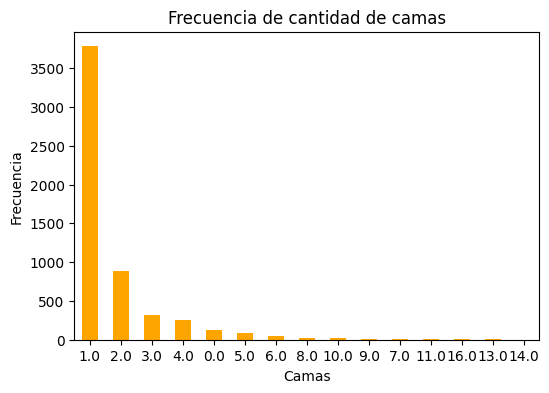

In [337]:
#beds
df = pd.DataFrame(data, columns=["beds"])
counts = df["beds"].value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["orange"])
plt.xlabel("Camas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de cantidad de camas")
plt.xticks(rotation=0)
plt.show()

In [338]:
#price


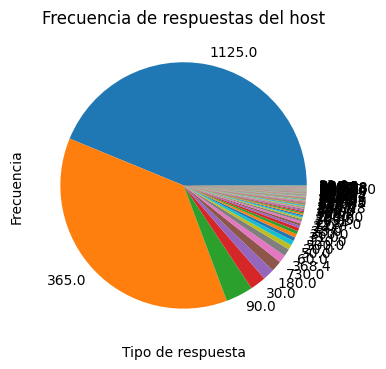

In [339]:
#maximum_nights_avg_ntm
df = pd.DataFrame(data, columns=["maximum_nights_avg_ntm"])
counts = df["maximum_nights_avg_ntm"].value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind="pie", color=["blue", "orange", "green"])
plt.xlabel("Tipo de respuesta")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de respuestas del host")
plt.xticks(rotation=0)
plt.show()

In [340]:
#availability_365


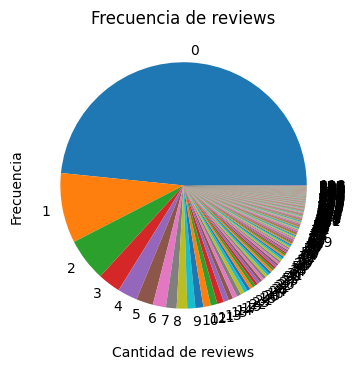

In [344]:
#number_of_reviews
df = pd.DataFrame(data, columns=["number_of_reviews"])
counts = df["number_of_reviews"].value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind="pie", color=["blue", "orange", "green"])
plt.xlabel("Cantidad de reviews")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de reviews")
plt.xticks(rotation=0)
plt.show()

In [342]:
#review_scores_value


In [343]:
#reviews_per_month
